In [1]:
import numpy as np 
import xarray as xr
#from os.path import join 

#### Path variables

In [2]:
import os
os.getcwd()

'/home/kevin/Escritorio/Kevin/workspace/CRAI_hourly_infilling/WindData_Preprocessing/10.-Separate_Variables_in_Files'

In [3]:
path = '/home/kevin/Escritorio/Kevin/workspace/CRAI_hourly_infilling/WindData_Preprocessing/'
input_path = "5.-Data_Split_train_val_test/CERRA/Split_data_2010-2022/ByYear"
data_file_train = "train_data_m_s_2010_2019_pen_CERRA.nc"
data_file_val = "val_data_m_s_2020_2020_pen_CERRA.nc"
data_file_test = "test_data_m_s_2021_2022_pen_CERRA.nc"
mask_file_train = "train_mask_m_s_2010_2019_pen_CERRA.nc"
mask_file_val = "val_mask_m_s_2020_2020_pen_CERRA.nc"
mask_file_test = "test_mask_m_s_2021_2022_pen_CERRA.nc"

In [4]:
data_train = xr.open_dataset(os.path.join(path, input_path, data_file_train))
data_val = xr.open_dataset(os.path.join(path, input_path, data_file_val))
data_test = xr.open_dataset(os.path.join(path, input_path, data_file_test))
mask_train = xr.open_dataset(os.path.join(path, input_path, mask_file_train))
mask_val = xr.open_dataset(os.path.join(path, input_path, mask_file_val))
mask_test = xr.open_dataset(os.path.join(path, input_path, mask_file_test))

In [5]:
data_train

<xarray.Dataset> Size: 6GB
Dimensions:    (time: 3652, y: 250, x: 250)
Coordinates:
    latitude   (y, x) float64 500kB ...
    longitude  (y, x) float64 500kB ...
  * time       (time) datetime64[ns] 29kB 2010-01-01 2010-01-02 ... 2019-12-31
  * x          (x) float64 2kB -1.617e+06 -1.612e+06 ... -2.53e+05 -2.475e+05
  * y          (y) float64 2kB -1.727e+06 -1.722e+06 ... -3.63e+05 -3.575e+05
Data variables:
    ws         (time, y, x) float32 913MB ...
    r2         (time, y, x) float32 913MB ...
    t2m        (time, y, x) float32 913MB ...
    msl        (time, y, x) float32 913MB ...
    orog       (time, y, x) float32 913MB ...
    sp         (time, y, x) float32 913MB ...
    sr         (time, y, x) float32 913MB ...
Attributes:
    GRIB_centre:             eswi
    GRIB_centreDescription:  Norrkoping
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Norrkoping
    history:                 2025-04-11T06:37 GRIB to CDM+CF via cfgrib-0.9.1...
    description:             Daily averages of 3-hourly CERRA data
    source_file:             CERRA_2010.nc
    created:                 2025-04-21T02:05:22
    averaging_method:        Mean of 8 three-hourly values per day

In [6]:
mask_train

<xarray.Dataset> Size: 913MB
Dimensions:  (time: 3652, y: 250, x: 250)
Coordinates:
  * time     (time) datetime64[ns] 29kB 2010-01-01 2010-01-02 ... 2019-12-31
  * y        (y) float64 2kB -1.727e+06 -1.722e+06 ... -3.63e+05 -3.575e+05
  * x        (x) float64 2kB -1.617e+06 -1.612e+06 ... -2.53e+05 -2.475e+05
Data variables:
    ws       (time, y, x) float32 913MB ...

In [7]:
# Get the list of variables to process
variables = list(data_train.data_vars.keys())

# Create a directory to store the separated files
output_dir = os.path.join(path, input_path, "separated_variables")
os.makedirs(output_dir, exist_ok=True)

# Process each dataset and variable
for dataset_name, dataset, mask in [
    ("train", data_train, mask_train),
    ("val", data_val, mask_val),
    ("test", data_test, mask_test)
]:
    # Process each variable
    for var in variables:
        # Extract single variable dataset
        var_ds = dataset[[var]].copy()
        
        # Save the variable dataset
        var_file = f"{dataset_name}_{var}_data_CERRA.nc"
        var_ds.to_netcdf(os.path.join(output_dir, var_file))
        print(f"Saved {var_file}")
        
        # Create mask for this variable by copying the ws mask structure
        var_mask = mask.copy()
        # Rename the 'ws' variable to match the current variable
        var_mask = var_mask.rename({'ws': var})
        
        # Save the mask
        mask_file = f"{dataset_name}_{var}_mask_CERRA.nc"
        var_mask.to_netcdf(os.path.join(output_dir, mask_file))
        print(f"Saved {mask_file}")

print("Processing complete!")

Saved train_ws_data_CERRA.nc
Saved train_ws_mask_CERRA.nc
Saved train_r2_data_CERRA.nc
Saved train_r2_mask_CERRA.nc
Saved train_t2m_data_CERRA.nc
Saved train_t2m_mask_CERRA.nc
Saved train_msl_data_CERRA.nc
Saved train_msl_mask_CERRA.nc
Saved train_orog_data_CERRA.nc
Saved train_orog_mask_CERRA.nc
Saved train_sp_data_CERRA.nc
Saved train_sp_mask_CERRA.nc
Saved train_sr_data_CERRA.nc
Saved train_sr_mask_CERRA.nc
Saved val_ws_data_CERRA.nc
Saved val_ws_mask_CERRA.nc
Saved val_r2_data_CERRA.nc
Saved val_r2_mask_CERRA.nc
Saved val_t2m_data_CERRA.nc
Saved val_t2m_mask_CERRA.nc
Saved val_msl_data_CERRA.nc
Saved val_msl_mask_CERRA.nc
Saved val_orog_data_CERRA.nc
Saved val_orog_mask_CERRA.nc
Saved val_sp_data_CERRA.nc
Saved val_sp_mask_CERRA.nc
Saved val_sr_data_CERRA.nc
Saved val_sr_mask_CERRA.nc
Saved test_ws_data_CERRA.nc
Saved test_ws_mask_CERRA.nc
Saved test_r2_data_CERRA.nc
Saved test_r2_mask_CERRA.nc
Saved test_t2m_data_CERRA.nc
Saved test_t2m_mask_CERRA.nc
Saved test_msl_data_CERRA.nc
S

checking    

In [9]:
ds_try = xr.open_dataset(os.path.join(output_dir, "train_r2_data_CERRA.nc"))

In [10]:
print(ds_try)

<xarray.Dataset> Size: 914MB
Dimensions:    (time: 3652, y: 250, x: 250)
Coordinates:
    latitude   (y, x) float64 500kB ...
    longitude  (y, x) float64 500kB ...
  * time       (time) datetime64[ns] 29kB 2010-01-01 2010-01-02 ... 2019-12-31
  * x          (x) float64 2kB -1.617e+06 -1.612e+06 ... -2.53e+05 -2.475e+05
  * y          (y) float64 2kB -1.727e+06 -1.722e+06 ... -3.63e+05 -3.575e+05
Data variables:
    r2         (time, y, x) float32 913MB ...
Attributes:
    GRIB_centre:             eswi
    GRIB_centreDescription:  Norrkoping
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Norrkoping
    history:                 2025-04-11T06:37 GRIB to CDM+CF via cfgrib-0.9.1...
    description:             Daily averages of 3-hourly CERRA data
    source_file:             CERRA_2010.nc
    created:                 2025-04-21T02:05:22
    averaging_method:        Mean of 8 three-hourly values per day


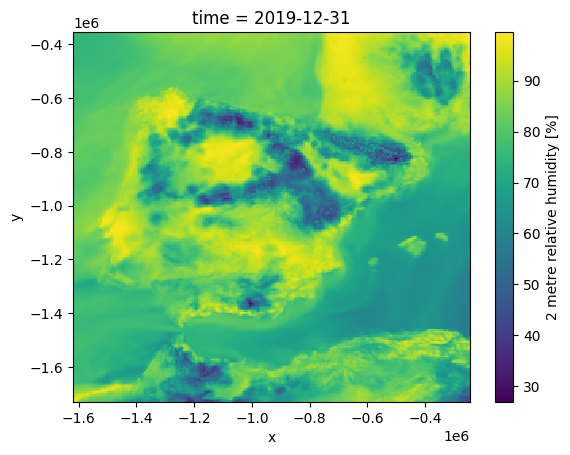

In [12]:
ds_try['r2'].isel(time=-1).plot()
